<a href="https://colab.research.google.com/github/gpensabem/Learnings/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instancia o nn.Module
    self.fc1 = nn.Linear(in_features, h1) #passando da camada de entrada para a camada oculta 1
    self.fc2 = nn.Linear(h1, h2) #passando da camada oculta 1 para a camada oculta 2
    self.out = nn.Linear(h2, out_features)  #passando da camada oculta 2 para a camada de saida

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [5]:
#Gera numeros aleatorios a partir de uma seed manual
torch.manual_seed(41)

In [8]:
#Criando um modelo
model = Model()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [11]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [14]:
#Mudando as ultimas colunas de Strings para Inteiros
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [17]:
#Setando X, y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [19]:
#Convertendo para np arrays
X = X.values
y = y.values

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
#Transformando os dados em dados de treino a partir do metodo train_test_split com 20% pra teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [25]:
#Convertendo X em float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [23]:
#Convertendo y em tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
#Configurando os criterios de erro do modelo,
#fazendo ele ajustar a taxa de aprendizado se ele perceber que o erro não aumenta com o passar das epocas
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #metodo Adam de otimização com Learning Rate (lr) = 0.01

In [31]:
#Treinando o Modelo
#Configurando o numero de epocas

epochs = 100
losses = []

for i in range(epochs):
  #avança na rede e pega uma predição
  y_pred = model.forward(X_train)

  #Medindo os erros (começa alto)
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy()) #adiciona os erros

  #imprime a cada 10 epocas

  if i%10 == 10:
    print(f'Epoch: {i} and loss: {loss}')

  #Backpropagation: pega o erro e volta para o inicio da rede para treinar novamente
  #e ajustar os pesos

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

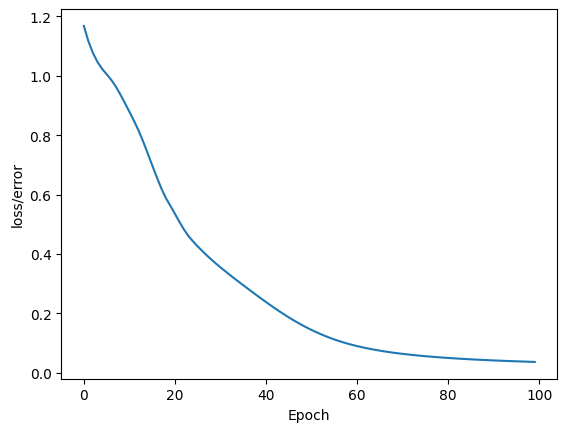

In [30]:
#plotando o aprendizado

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
#Validando o modelo no DataSet
with torch.no_grad(): #Desativa o backpropagation
  y_eval = model.forward(X_test) # X_test são as características do teste, y_eval será as predições
  loss = criterion(y_eval, y_test) #Encontra o erro


In [32]:
loss


tensor(0.0167, grad_fn=<NllLossBackward0>)

In [42]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    #imprime o tipo de flor a rede pensa que é
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
    #imprime a quantidade de certos
    if y_val.argmax().item() == y_test[i]: # se o valor sem o backpropagation for igual o do modelo, quer dizer que o modelo acertou
      correct += 1

print(f'We got {correct} corrects!')

1.) tensor([-8.9674,  3.6572,  8.8377]) 	 Virginica 	 2
2.) tensor([-13.0490,   1.3494,  14.6756]) 	 Virginica 	 2
3.) tensor([-14.1085,   2.2026,  15.4424]) 	 Virginica 	 2
4.) tensor([-1.2142,  8.8135, -0.7958]) 	 Versicolor 	 1
5.) tensor([-11.3532,   2.8445,  11.9812]) 	 Virginica 	 2
6.) tensor([ 2.8495, 11.2308, -5.8903]) 	 Versicolor 	 1
7.) tensor([-7.6914,  4.6495,  7.3064]) 	 Virginica 	 2
8.) tensor([-0.6753,  8.9050, -1.3140]) 	 Versicolor 	 1
9.) tensor([-9.4809,  3.6752,  9.6093]) 	 Virginica 	 2
10.) tensor([-13.7852,   1.3127,  15.6135]) 	 Virginica 	 2
11.) tensor([-6.8133,  4.9871,  6.3344]) 	 Virginica 	 2
12.) tensor([ 26.7769,  19.0963, -30.5959]) 	 Setosa 	 0
13.) tensor([ 23.9883,  17.1209, -27.4162]) 	 Setosa 	 0
14.) tensor([ 4.9444, 10.8248, -8.0569]) 	 Versicolor 	 1
15.) tensor([ 23.9805,  17.9312, -28.0957]) 	 Setosa 	 0
16.) tensor([-5.8816,  6.0628,  4.9994]) 	 Virginica 	 1
17.) tensor([ 24.4961,  17.8974, -28.3518]) 	 Setosa 	 0
18.) tensor([-8.1176,  4

In [47]:
#Validando novos dados
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  print(model(new_iris))

tensor([ 25.5049,  18.0859, -29.0667])


In [46]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [48]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-8.7384,  3.5388,  8.8259])


In [49]:
#Salvando o Modelo
torch.save(model.state_dict(), 'my_first_model.pt')

In [51]:
#Carregando o modelo salvo
new_model = Model()
new_model.load_state_dict(torch.load('my_first_model.pt'))

<ipython-input-51-ed031fc68604>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_first_model.pt'))


<All keys matched successfully>

In [52]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)